# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive) 

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155052 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 7.8 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31647 sha256=a4e6246ce79d1129fc0772e97d497cfab69c2e5fc482b6456284e040aa60685d
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
#Analyzing Data
df=pd.read_excel('Book1.xlsx')
df.head()

,Date,Close
0,2017-01-02,7698.80
1,2017-01-03,7820.58
2,2017-01-04,7800.33
3,2017-01-05,7925.28
4,2017-01-06,7912.32


In [3]:
df.columns=['Date','PSU Data']
df.head()

,Date,PSU Data
0,2017-01-02,7698.80
1,2017-01-03,7820.58
2,2017-01-04,7800.33
3,2017-01-05,7925.28
4,2017-01-06,7912.32


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,PSU Data
0,2017-01-02,7698.80
1,2017-01-03,7820.58
2,2017-01-04,7800.33
3,2017-01-05,7925.28
4,2017-01-06,7912.32


In [5]:
df.set_index('Date',inplace=True)
df.head()

,PSU Data
Date,
2017-01-02,7698.80
2017-01-03,7820.58
2017-01-04,7800.33
2017-01-05,7925.28
2017-01-06,7912.32


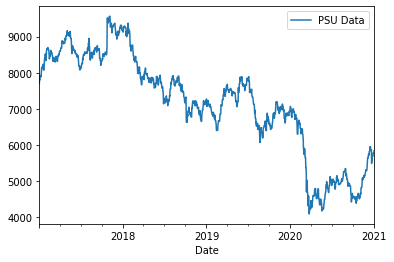

In [6]:
#Visualization of Data
df.plot()

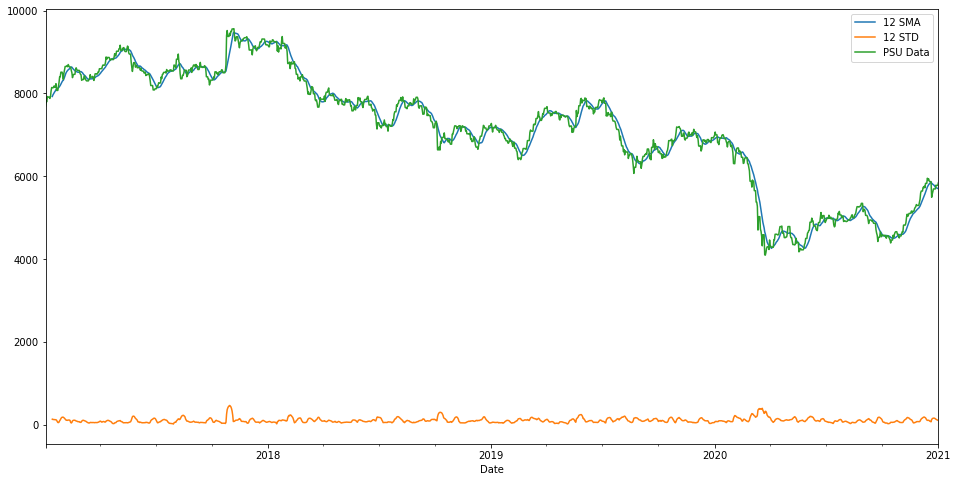

In [7]:
df['PSU Data'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df['PSU Data'].rolling(12).std().plot(label='12 STD')
df['PSU Data'].plot()
plt.legend()

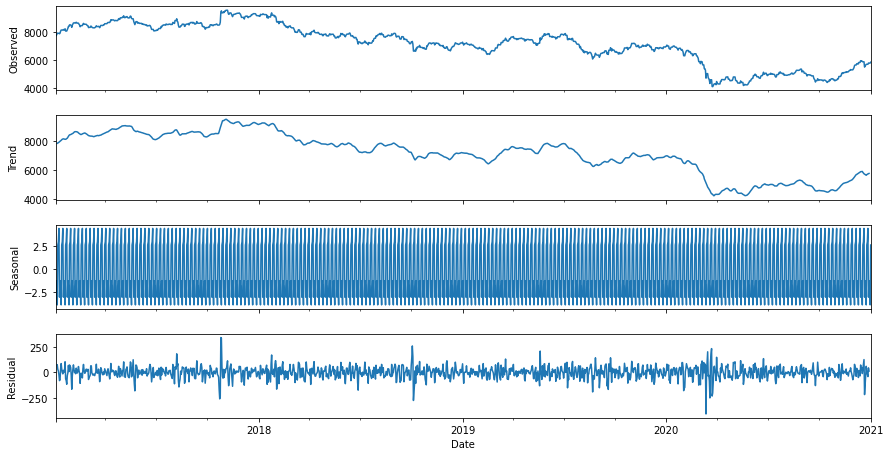

In [8]:
#Decomposition of Time Series Data to its trend,seasonality and residual components
from statsmodels.tsa.seasonal import seasonal_decompose  
decomp = seasonal_decompose(df['PSU Data'])
fig=decomp.plot()
fig.set_size_inches(14,7) 

In [9]:
#converting the data into stationary form
#dicky fuller test
from statsmodels.tsa.stattools import adfuller 
fuller_test = adfuller (df['PSU Data'])
fuller_test 

(-0.8794795890616881,
 0.7946549550701474,
 0,
 1460,
 {'1%': -3.434836872962171,
  '10%': -2.567825016419591,
  '5%': -2.863521656701378},
 16560.559342406756)

In [10]:
#Test p value
def test_p_value(data): 
   fuller_test = adfuller(data)
print( ' p-value: ',fuller_test[1])
if fuller_test[1] <= 0.05:
  print( 'Reject null hypothesis,data is stationary')
else:
    print('Do not reject null hypothesis, data is not stationary')
test_p_value(df['PSU Data'])

 p-value:  0.7946549550701474
Do not reject null hypothesis, data is not stationary


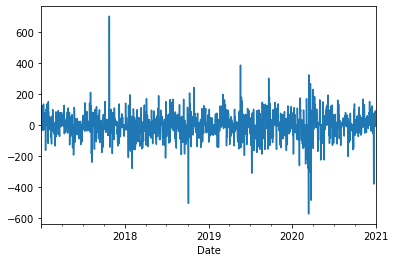

In [11]:
#First order difference
test_p_value(df['PSU Data'])
df['First_diff'] = df['PSU Data']-df['PSU Data'].shift(1)
df['First_diff'].plot()

In [12]:
test_p_value(df['First_diff'].dropna())

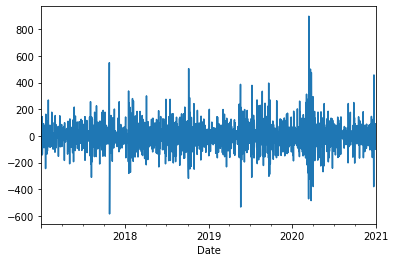

In [13]:
#Second order difference 
df['Second_diff']=df['First_diff'] - df['First_diff'].shift(1)
df['Second_diff'].plot()

In [14]:
test_p_value(df['Second_diff'].dropna())

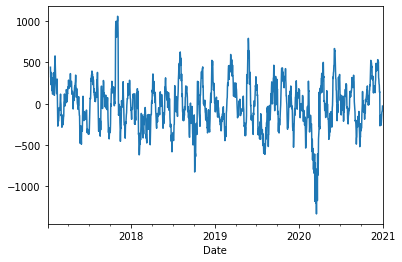

In [15]:
#Seasonal difference
df['Seasonal_diff']=df['PSU Data'] - df['PSU Data'].shift(12)
df['Seasonal_diff'].plot()

In [16]:
test_p_value(df['Seasonal_diff'].dropna())

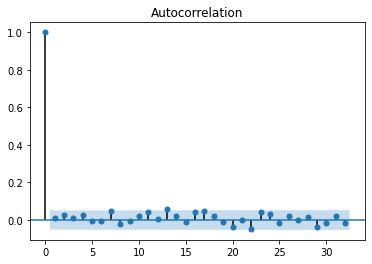

In [17]:
#plotting the ACF and PACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
first_diff = plot_acf(df['First_diff'].dropna())

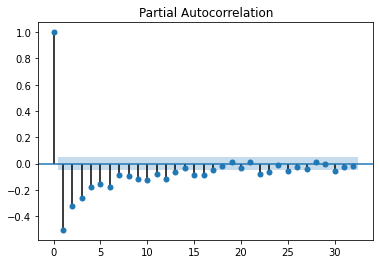

In [18]:
sec_diff = plot_pacf(df['Second_diff'].dropna())

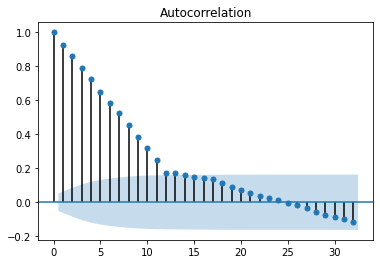

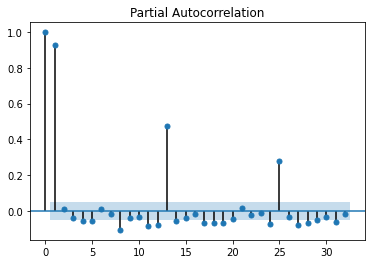

In [19]:
p1 = plot_acf(df['Seasonal_diff'].dropna())
p2 = plot_pacf(df['Seasonal_diff'].dropna())

In [20]:
#Constructing the ARIMA Model
df.index.freq = 'D'
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.statespace.SARIMAX(df['PSU Data'],order = (0,1,0),seasonal_order = (1,1,1,12))

#Fit the model
results = model.fit()
results.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           PSU Data   No. Observations:                 1461
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -8375.254
Date:                            Thu, 28 Oct 2021   AIC                          16756.509
Time:                                    03:40:33   BIC                          16772.343
Sample:                                01-02-2017   HQIC                         16762.418
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0056      0.030      0.188      0.851      -0.053       0.064
ma.S.L12      -0.9926      0.018    -54.578      0.000      -1.028      -0.957
sigma2      5980.9998    108.383     55.184      0.000    5768.574    6193.426
===================================================================================
Ljung-Box (Q):                       49.78   Jarque-Bera (JB):              6240.10
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#Know about the residuals value or error
results.resid

Date
2017-01-02    7698.800000
2017-01-03     121.780000
2017-01-04     -20.250000
2017-01-05     124.950000
2017-01-06     -12.960000
                 ...     
2020-12-28      89.601739
2020-12-29      11.177300
2020-12-30       1.090795
2020-12-31       0.362768
2021-01-01      58.993177
Freq: D, Length: 1461, dtype: float64

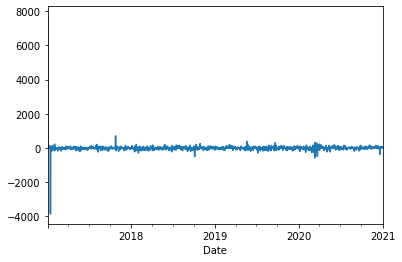

In [22]:
results.resid.plot()

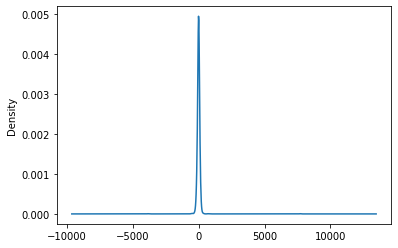

In [23]:
results.resid.plot(kind='kde')

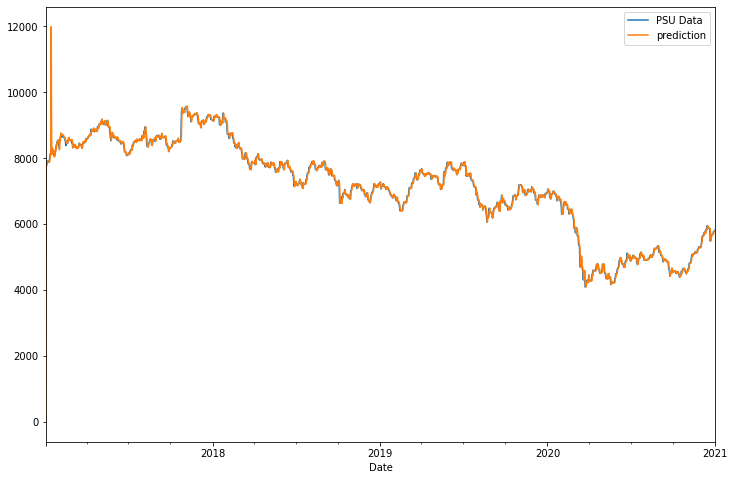

In [24]:
#predicting or forecasting
df['prediction'] = results.predict()
df[['PSU Data','prediction']].plot(figsize = (12,8))

In [25]:
from pandas.tseries.offsets import DateOffset
extra_dates = [df.index[-1] + DateOffset(months = m) for m in range (1,24)]

extra_dates

[Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00')]

In [27]:
#now another datafame is created with these extra future date values
forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
forecast_df.head()

,PSU Data,First_diff,Second_diff,Seasonal_diff,prediction
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


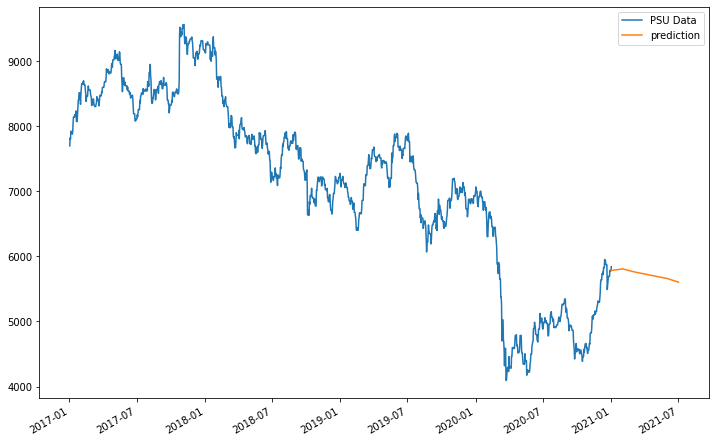

In [28]:
#now the origional dataframe and this forecast dataframe is concatenated into a single one for forecasting
final_df = pd.concat([df,forecast_df])

#we can predict the values for end data points
final_df['prediction'] = results.predict(start=1460, end=1660)
final_df[['PSU Data','prediction']].plot(figsize=(12,8))
